## Performing the Required dataanalysis and perform Linear Regression on the dataset to visualise the output

In [6]:
#FOR HANDLING THE DATASETS
import pandas as pd
#For plotting graphs
from matplotlib import pyplot as plt
#FOR IMPORTING THE MACHINE LEARNING ALGORITHMS TRY SCIKIT LEARN
from sklearn.neighbors import KNeighborsClassifier
#importing seaborn will give a great color to the plotting
import seaborn as sns
#importing datasets from scikit learn
from sklearn.datasets import load_iris
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [7]:
#import the dataset from the comma seperated file:
dataa=load_iris()
np.random.seed(1234)
pandadataframe=dataa['data']
pandatargetframe=dataa['target']
pandadataframe=pd.DataFrame(pandadataframe,columns=['sepal length','sepal width','petal length','petal width'])
pandatargetframe=pd.DataFrame(pandatargetframe,columns=['species'])
dataa=pd.concat([pandadataframe,pandatargetframe],axis=1)
dataa=dataa.sample(frac=1).reset_index(drop=True)
dataa


,sepal length,sepal width,petal length,petal width,species
0,6.1,3.0,4.6,1.4,1
1,6.1,2.9,4.7,1.4,1
2,6.3,2.9,5.6,1.8,2
3,4.6,3.4,1.4,0.3,0
4,5.2,2.7,3.9,1.4,1
5,4.7,3.2,1.6,0.2,0
6,5.2,3.5,1.5,0.2,0
7,5.0,3.2,1.2,0.2,0
8,5.7,2.8,4.1,1.3,1
9,7.7,2.8,6.7,2.0,2


## Use of Seaborn to see how the data was scattered in a cartesian x-y plane and identifying some observations:
1.Clearly setosa was seperated if we can draw a line which seperates the setosa from other flowers which we can understand clearly
2.There is a significant overlap between Virginica and Versicolor so we cannot draw any line to separate them

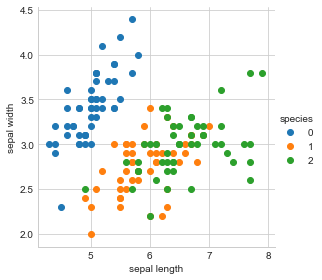

In [8]:

#variation to show the difference between setosa,versicolor and Virginica......
sns.set_style("whitegrid")
sns.FacetGrid(dataa,hue="species",size=4)\
.map(plt.scatter,"sepal length","sepal width")\
.add_legend();
plt.show()

## Pair plots using all the features that is we need to know which two fetaures gives us the best division or classification are considered to be the best features.I throughly understand since we have very less features which are close to 4 (4c2 =6) where we need to analyze six plots to identify the best two features.

## Observations:
1.Petal legth and petal width gives us a good classification from the pair plot which is also called as bivariate analysis.

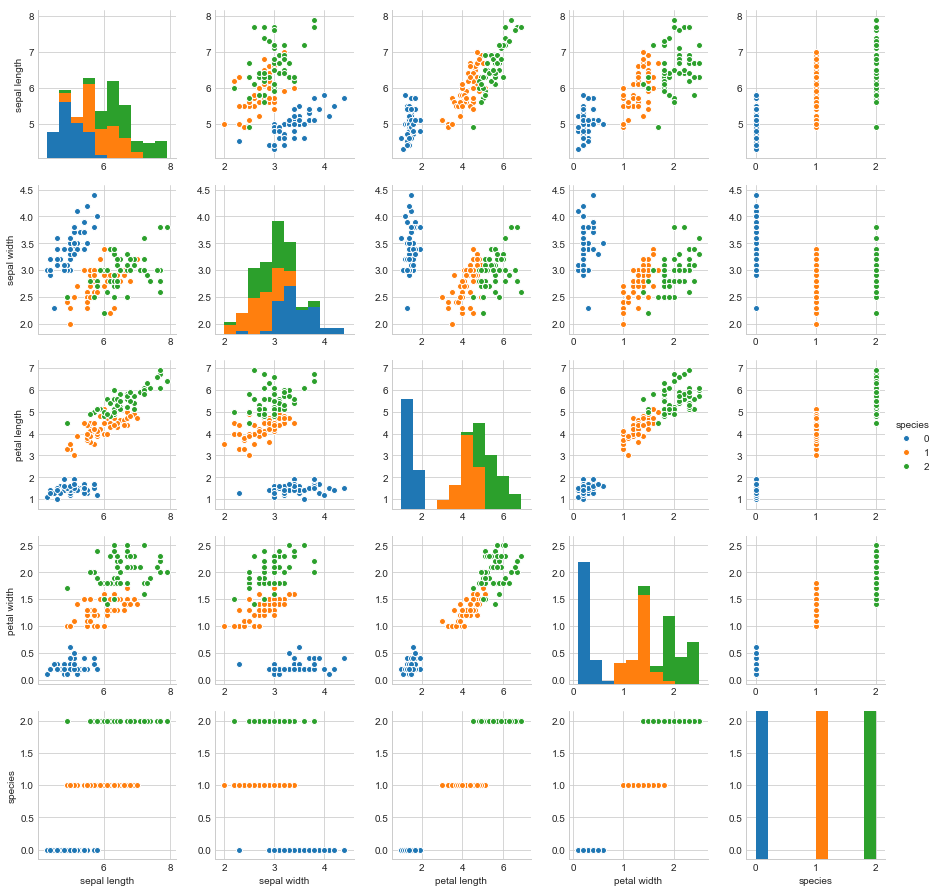

In [12]:
# find the pair plots of each and every combination to find which two features contribute more to the dataset and which two features contribute more to the dataset
plt.close();
sns.set_style("whitegrid")
sns.pairplot(dataa,hue="species")
plt.show()

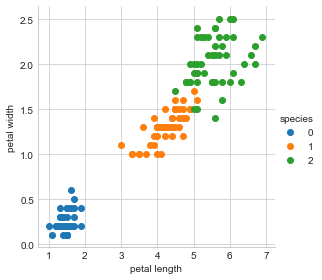

In [13]:
#Pair plot which we choose is the best...
sns.set_style("whitegrid")
sns.FacetGrid(dataa,hue="species",size=4)\
.map(plt.scatter,"petal length","petal width")\
.add_legend();
plt.show()

## Probability distribution function is known as smoothening Histogram curve which says the density of flowers at each point

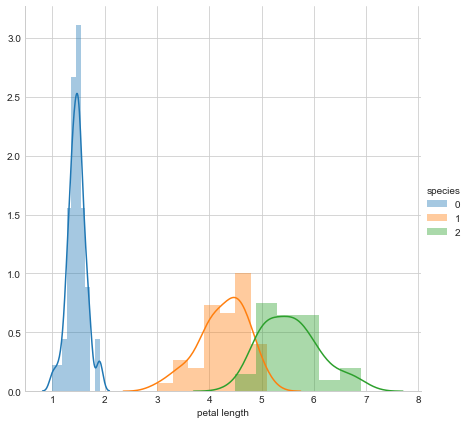

In [14]:
#probability distribution
sns.set_style("whitegrid")
sns.FacetGrid(dataa,hue="species",size=6)\
.map(sns.distplot,"petal length")\
.add_legend();
plt.show()

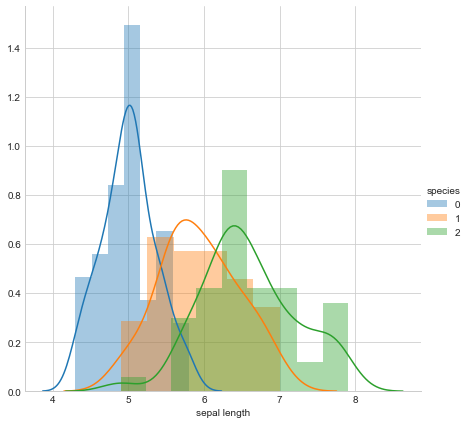

In [15]:

sns.set_style("whitegrid")
sns.FacetGrid(dataa,hue="species",size=6)\
.map(sns.distplot,"sepal length")\
.add_legend();
plt.show()



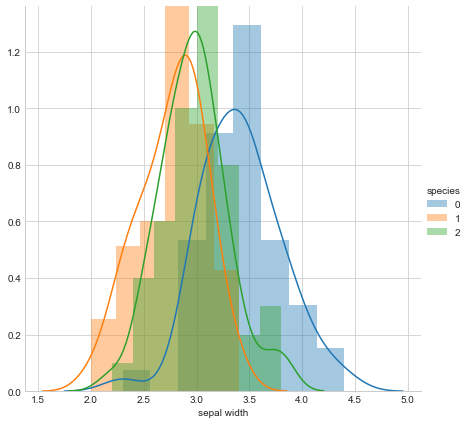

In [16]:

sns.set_style("whitegrid")
sns.FacetGrid(dataa,hue="species",size=6)\
.map(sns.distplot,"sepal width")\
.add_legend();
plt.show()

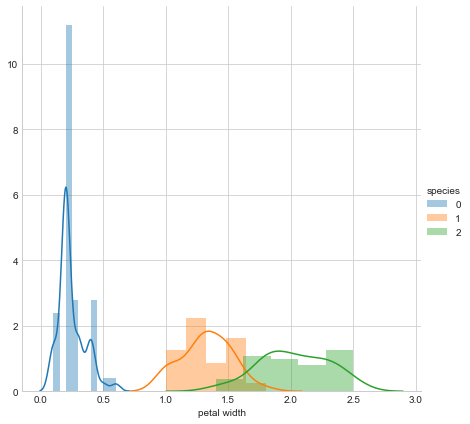

In [17]:

sns.set_style("whitegrid")
sns.FacetGrid(dataa,hue="species",size=6)\
.map(sns.distplot,"petal width")\
.add_legend();
plt.show()

## clearly the petal length has good distribution when compare with other features..

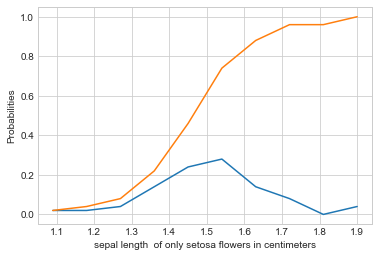

In [18]:
cnts,binn=np.histogram(dataa['petal length'][dataa['species']==0],bins=10,density=True)
probabilitydistributionfunction=cnts/sum(cnts)
cumilativedistributionfunction=np.cumsum(probabilitydistributionfunction)
plt.plot(binn[1:],probabilitydistributionfunction)
plt.ylabel("Probabilities")
plt.plot(binn[1:],cumilativedistributionfunction)
plt.xlabel("sepal length  of only setosa flowers in centimeters")
plt.show()

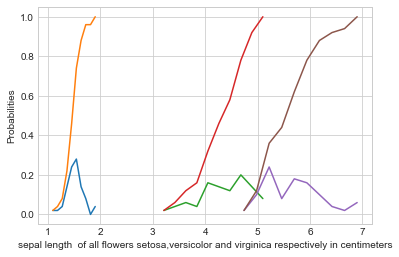

In [19]:
cnts,binn=np.histogram(dataa['petal length'][dataa['species']==0],bins=10,density=True)
probabilitydistributionfunction=cnts/sum(cnts)
cumilativedistributionfunction=np.cumsum(probabilitydistributionfunction)
plt.plot(binn[1:],probabilitydistributionfunction)
#plt.ylabel("Probabilities")
plt.plot(binn[1:],cumilativedistributionfunction)
#plt.xlabel("sepal length  of only setosa flowers in centimeters")

cnts,binn=np.histogram(dataa['petal length'][dataa['species']==1],bins=10,density=True)
probabilitydistributionfunction=cnts/sum(cnts)
cumilativedistributionfunction=np.cumsum(probabilitydistributionfunction)
plt.plot(binn[1:],probabilitydistributionfunction)
#plt.ylabel("Probabilities")
plt.plot(binn[1:],cumilativedistributionfunction)
#plt.xlabel("sepal length  of only versicolor  flowers in centimeters")



cnts,binn=np.histogram(dataa['petal length'][dataa['species']==2],bins=10,density=True)
probabilitydistributionfunction=cnts/sum(cnts)
cumilativedistributionfunction=np.cumsum(probabilitydistributionfunction)
plt.plot(binn[1:],probabilitydistributionfunction)
plt.ylabel("Probabilities")
plt.plot(binn[1:],cumilativedistributionfunction)
plt.xlabel("sepal length  of all flowers setosa,versicolor and virginica respectively in centimeters")
plt.show()

## BOX PLOTS/WHISKER PLOTS for understanding the percentiles.

## Some observations made are:
1.almost all the Setosa class flowers are well separated from the rest of other flowers and the spread of the distribution is very narrow it means all the setosa flowers are concentrated towards the mean.
2.Yes, there is an overlap between versicolor and  Virginica  flowers but lets try to construct a very simple model that classifies the whether a flower belongs to setosa,Virginica or versicolor

## General Rule based system to construct a simple model and calculating small errors within our rule based system using whisker plots:
3. if(petal lenght>=0 && petal_length<=2)
               print("I classify my flower to be setosa")-----------> which is 100% accurate because i dont see any overlap with setosa flowers by other flowers.
   if(petal length>2 && petal length<5)
                 print("I classify my flower to be Virginica")--> of course there is an overlap because of this assumption we can try to predict or classify almost close to 95% of virginica flowers correctly. and 5% of virginica we classify wrongly.
   if(petal length>5)
                 print("I classify my flower to be Versicolor")----> here there is 25% error because petal length 5 is equivalent to 25 percentile of box plot versicolor which we erronously try to predict as Virginica so accuracy is 75% and error is 25% by just building a rule based system.


So, my conclusion is we can try to find accuracy and errors very easily with respect to each and every class despite using any advance algorithms which is really helpful especially in the very initial stages of exploratory data analysis...
     

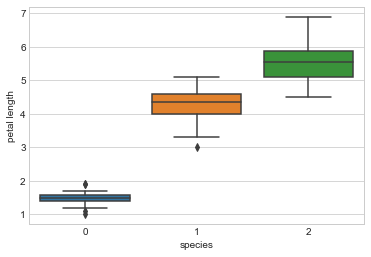

In [20]:
sns.boxplot(x="species",y="petal length",data=dataa)
plt.show()

## Violin plot has the advantage of both box plots and it can plot the Probability Distribution functions So it definitely helps to Understand:
1.How widely spread the data instead of calculating the mean,standard deviation the figure clearly measures the spread of the data.
2.Internal Whisker plots or box plots suggest us how many percentile of the flowers have the petal length less than or greater than some value we can clearly understand the quantiles easily which helps us to calulate errors very easily however we can find only 25,50,75,and Inter quartile range from Whisker plots.

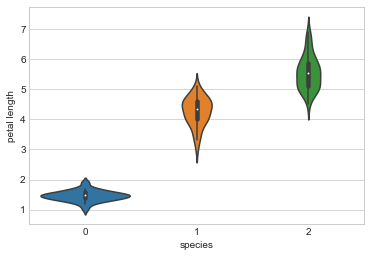

In [21]:
sns.violinplot(x="species",y="petal length",data=dataa,size=7)
plt.show()

## Important data slicing for Training and Testing:
On the general basis
1.I tried to perform shuffling to make the dataset more random because some classifiers perform poorly in testingnif we have the data sequentially this often leads to overfitting.so to avoid the first assumption is to make the data very random.
2.As per the cross fold validation they try to split the whole data as :
    a)70 % of data is for training.
    b)15% of data is for Validation
    c)15% of data is for Testing
3.Linear regression throughly follows the line Y=mx+c we try to predict the class of the flower from the scikit learn linear    regression algorithm
4.lastly i tried to perform the equality operation to see how accurately my model predicted or performed on the test dataset

True


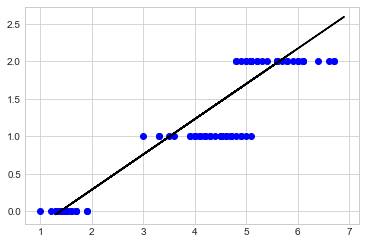

Mean square Validation error is:0.062800976869
Mean squre Training error is :0.060867012662
The coefficents are:[[ 0.47097715]]
The intercept is [-0.65329508]


In [22]:
#y_train=pandatargetframe['species'][:125]
#x_train=pandadataframe['petal length'][:125]
#print(y_train)
x_train=dataa[['petal length']][:105].values
y_train=dataa[['species']][:105].values
print(len(x_train)==len(y_train))
#print(x_train)
x_validation=dataa[['petal length']][105:125].values
y_validation=dataa[['species']][105:125].values
x_test=dataa[['petal length']][125:].values
y_test=dataa[['species']][125:].values
from sklearn.linear_model import  LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.fit(x_validation,y_validation)

predictions=lm.predict(x_test)
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,predictions,color='black')
plt.show()
lst=list(predictions)
lst=np.array(lst,dtype='int')
mve=np.mean((y_validation-lm.predict(x_validation))**2)
print("Mean square Validation error is:"+str(mve))
mte=np.mean((y_test-lm.predict(x_test))**2)
print("Mean squre Training error is :"+str(mte))
print("The coefficents are:"+str(lm.coef_))
print("The intercept is "+str(lm.intercept_))

## fitting polynomial regression by little preprocessing
since we have 4 features the equation would be y=w1*x1+w2*x2+w3*x3+w0

In [25]:
x1_train=dataa[['sepal length','sepal width','petal length','petal width']][:105]
y1_train=dataa[['species']][:105]
x1_test=dataa[['sepal length','sepal width','petal length','petal width']][105:]
y1_test=dataa[['species']][105:]

lr=LinearRegression()
lr.fit(x1_train,y1_train)


predictor=lr.predict(x1_test)
print("The coefficients of equations of petal length,petal width,sepal length,sepal width are {} respectively and {} is intercept of  regression equation".format(lr.coef_,lr.intercept_))

mte=np.mean((y1_test-lr.predict(x1_test))**2)
print("mean square testing error "+str(mte))





The coefficients of equations of petal length,petal width,sepal length,sepal width are [[-0.00774586 -0.10196807  0.15374687  0.65531169]] respectively and [-0.02910819] is intercept of  regression equation
mean square testing error species    0.046819
dtype: float64
